Initial wave function: [0.10218497 0.45796126 0.75505047 0.45796126]
Quantum circuit:
      ┌────────────┐┌─────────┐┌─┐         
q_0: ┤ Ry(2.9369) ├┤ Rz(0.1) ├┤M├─────────
     ├────────────┤├─────────┤└╥┘┌─┐      
q_1: ┤ Ry(2.1902) ├┤ Rz(0.2) ├─╫─┤M├──────
     ├────────────┤├─────────┤ ║ └╥┘┌─┐   
q_2: ┤ Ry(1.4301) ├┤ Rz(0.3) ├─╫──╫─┤M├───
     ├────────────┤├─────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Ry(2.1902) ├┤ Rz(0.4) ├─╫──╫──╫─┤M├
     └────────────┘└─────────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════╩══╩══╩══╩═
                               0  1  2  3 
Compiled circuit:
 global phase: 5.7832
     ┌──────────────────┐┌─┐         
q_0: ┤ U3(2.9369,0.1,0) ├┤M├─────────
     ├──────────────────┤└╥┘┌─┐      
q_1: ┤ U3(2.1902,0.2,0) ├─╫─┤M├──────
     ├──────────────────┤ ║ └╥┘┌─┐   
q_2: ┤ U3(1.4301,0.3,0) ├─╫──╫─┤M├───
     ├──────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ U3(2.1902,0.4,0) ├─╫──╫──╫─┤M├
     └──────────────────┘ ║  ║  ║ └╥┘
c: 4/═════════════════════╩══╩══╩══╩═
                    

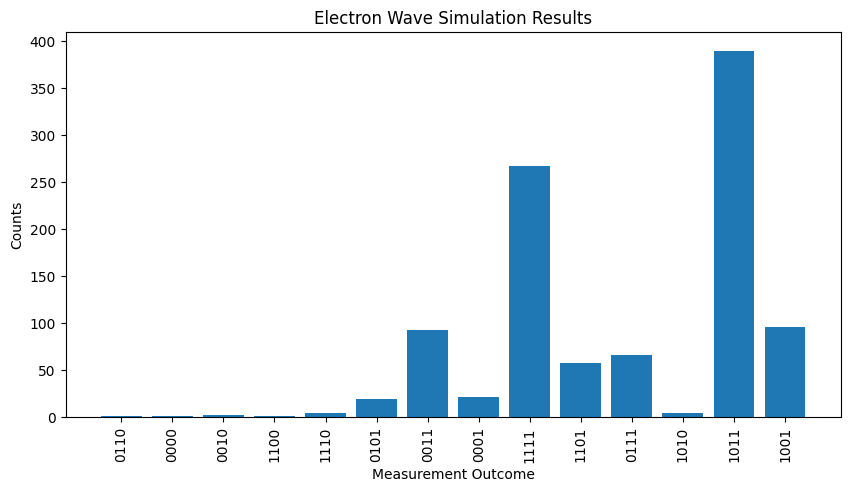

In [12]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def initialize_wavefunction(qc, qubits, wave_function):
    """Initialize the quantum circuit with the given wave function."""
    for i, amplitude in enumerate(wave_function):
        qc.ry(2 * np.arccos(amplitude), qubits[i])

def apply_phase_shift(qc, qubits, phase_shifts):
    """Apply phase shift to simulate the weak phase object."""
    for i, phase in enumerate(phase_shifts):
        qc.rz(phase, qubits[i])

def simulate_electron_wave(phase_shifts, n_qubits=4):
    # Initialize quantum circuit
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(qr, cr)
    
    # Define initial wave function (Gaussian-like distribution)
    initial_wave_function = np.array([np.exp(-0.5 * (i - n_qubits / 2) ** 2) for i in range(n_qubits)])
    initial_wave_function /= np.linalg.norm(initial_wave_function)
    
    print("Initial wave function:", initial_wave_function)  # Debug print
    
    # Initialize wave function in the quantum circuit
    initialize_wavefunction(qc, qr, initial_wave_function)
    
    # Apply phase shift to simulate the weak phase object
    apply_phase_shift(qc, qr, phase_shifts)
    
    # Measure the results
    qc.measure(qr, cr)
    
    print("Quantum circuit:\n", qc)  # Debug print
    
    return qc

# Define phase shifts to simulate the weak phase object
phase_shifts = [0.1, 0.2, 0.3, 0.4]

# Simulate electron wave
qc = simulate_electron_wave(phase_shifts, n_qubits=4)

# Execute the circuit using AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
print("Compiled circuit:\n", compiled_circuit)  # Debug print
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

print("Counts:", counts)  # Debug print

# Manually plot the histogram
if counts:
    outcomes = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(outcomes, values)
    plt.title("Electron Wave Simulation Results")
    plt.xlabel("Measurement Outcome")
    plt.ylabel("Counts")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No counts to display.")


In [ ]:
#expandig to 2D

In [15]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def initialize_wavefunction_2d(qc, qubits, wave_function):
    """Initialize the quantum circuit with the given 2D wave function."""
    for i, amplitude in enumerate(wave_function.flatten()):
        qc.ry(2 * np.arccos(amplitude), qubits[i])

def apply_phase_shift_2d(qc, qubits, phase_shifts):
    """Apply phase shift to simulate the weak phase object in 2D."""
    for i, phase in enumerate(phase_shifts.flatten()):
        qc.rz(phase, qubits[i])

def simulate_electron_wave_2d(phase_shifts, grid_size=(4, 4)):
    n_qubits = grid_size[0] * grid_size[1]
    
    # Initialize quantum circuit
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(qr, cr)
    
    # Define initial 2D wave function (Gaussian-like distribution)
    x = np.linspace(-1, 1, grid_size[0])
    y = np.linspace(-1, 1, grid_size[1])
    X, Y = np.meshgrid(x, y)
    initial_wave_function = np.exp(-0.5 * (X**2 + Y**2))
    initial_wave_function /= np.linalg.norm(initial_wave_function)
    
    print("Initial 2D wave function:\n", initial_wave_function)  # Debug print
    
    # Initialize wave function in the quantum circuit
    initialize_wavefunction_2d(qc, qr, initial_wave_function)
    
    # Apply phase shift to simulate the weak phase object
    apply_phase_shift_2d(qc, qr, phase_shifts)
    
    # Measure the results
    qc.measure(qr, cr)
    
    print("Quantum circuit:\n", qc)  # Debug print
    
    return qc, initial_wave_function

# Define phase shifts to simulate the weak phase object in 2D
phase_shifts = np.array([[0.1, 0.2, 0.3, 0.4],
                         [0.2, 0.3, 0.4, 0.5],
                         [0.3, 0.4, 0.5, 0.6],
                         [0.4, 0.5, 0.6, 0.7]])

# Simulate electron wave in 2D
qc, initial_wave_function = simulate_electron_wave_2d(phase_shifts, grid_size=(4, 4))

# Execute the circuit using AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
print("Compiled circuit:\n", compiled_circuit)  # Debug print
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

print("Counts:", counts)  # Debug print

# Verify the number of qubits
n_qubits = 4 * 4
bitstring_length = len(list(counts.keys())[0])
print(f"Expected number of qubits: {n_qubits}")
print(f"Actual bitstring length: {bitstring_length}")

# Convert counts to 2D array for visualization
def counts_to_2d_array(counts, grid_size):
    n_qubits = grid_size[0] * grid_size[1]
    result_array = np.zeros((grid_size[0], grid_size[1]))
    
    for bitstring, count in counts.items():
        # Truncate the bitstring to the expected length
        truncated_bitstring = bitstring[-n_qubits:]
        index = int(truncated_bitstring, 2)
        row = index // grid_size[1]
        col = index % grid_size[1]
        print(f"Bitstring: {truncated_bitstring}, Index: {index}, Row: {row}, Col: {col}, Count: {count}")  # Debug print
        result_array[row, col] = count
    
    return result_array

result_array = counts_to_2d_array(counts, (4, 4))

print("Result array:\n", result_array)  # Debug print

# Plot the initial wave function and the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(initial_wave_function, cmap='viridis', origin='lower')
ax[0].set_title("Initial 2D Wave Function")
ax[0].axis('off')

ax[1].imshow(result_array, cmap='viridis', origin='lower')
ax[1].set_title("Electron Wave Simulation Results")
ax[1].axis('off')

plt.show()


Initial 2D wave function:
 [[0.14566959 0.22718971 0.22718971 0.14566959]
 [0.22718971 0.35433041 0.35433041 0.22718971]
 [0.22718971 0.35433041 0.35433041 0.22718971]
 [0.14566959 0.22718971 0.22718971 0.14566959]]
Quantum circuit:
       ┌────────────┐┌─────────┐┌─┐                                             
 q_0: ┤ Ry(2.8492) ├┤ Rz(0.1) ├┤M├─────────────────────────────────────────────
      ├────────────┤├─────────┤└╥┘┌─┐                                          
 q_1: ┤ Ry(2.6832) ├┤ Rz(0.2) ├─╫─┤M├──────────────────────────────────────────
      ├────────────┤├─────────┤ ║ └╥┘┌─┐                                       
 q_2: ┤ Ry(2.6832) ├┤ Rz(0.3) ├─╫──╫─┤M├───────────────────────────────────────
      ├────────────┤├─────────┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ Ry(2.8492) ├┤ Rz(0.4) ├─╫──╫──╫─┤M├────────────────────────────────────
      ├────────────┤├─────────┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ Ry(2.6832) ├┤ Rz(0.2) ├─╫──╫──╫──╫─┤M├

IndexError: index 13822 is out of bounds for axis 0 with size 4